#**A2: Bias in Data**

The goal of this assignment is to identify what, if any, sources of bias may exist in the [Wikipedia Talk corpus](https://figshare.com/projects/Wikipedia_Talk/16731) datasets, and to develop testable hypotheses about how these biases might impact the behavior of machine learning models trained on the data, when those models are used for research purposes or to power data-driven applications. 

I have chosen to analyze the datasets for "toxicity" annotations https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973 and the datsets for "personal attacks" annotaions https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Personal_Attacks/4054689 to discover if they have any source to bias that might impact the applications using them.

## **Step 1. Data Acquisiton**

In [79]:
# importing libraries to be used for analysis
import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

Download Wikipedia Talk corpus from [Figshare](https://figshare.com/projects/Wikipedia_Talk/16731) for Toxicity and Personal attacks datasets

In [36]:
# funtion to donwload datasets
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)        

In [3]:
# download Toxicity dataset
download_url('https://ndownloader.figshare.com/articles/4563973/versions/2','Toxicity.zip')
zip = ZipFile('Toxicity.zip')
zip.extractall('Toxicity')

# download Personal Attacks dataset
download_url('https://ndownloader.figshare.com/articles/4054689/versions/6','Personal_Attacks.zip')
zip = ZipFile('Personal_Attacks.zip')
zip.extractall('Personal_Attacks')

In [4]:
# read data from tsv files into pandas dataframe
toxicity_annotations_df = pd.read_csv("Toxicity/toxicity_annotations.tsv", sep='\t')
toxicity_comments_df = pd.read_csv("Toxicity/toxicity_annotated_comments.tsv", sep='\t')
toxicity_worker_demographics_df = pd.read_csv("Toxicity/toxicity_worker_demographics.tsv", sep='\t')

attack_annotations_df = pd.read_csv("Personal_Attacks/attack_annotations.tsv", sep='\t')
attack_comments_df = pd.read_csv("Personal_Attacks/attack_annotated_comments.tsv", sep='\t')
attack_worker_demographics_df = pd.read_csv("Personal_Attacks/attack_worker_demographics.tsv", sep='\t')

Quick check to see dataframe columns and rows to have a broad idea of data

In [5]:
# check toxicity dataframes 
toxicity_worker_demographics_df.head(5)

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


In [6]:
# check personal attacks dataframes 
attack_comments_df.head(5)

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [7]:
attack_annotations_df.head(5)

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


## **Step 2. Data Analysis**

#### **Analysis 1: How well does the demographic profile of the crowdworkers match that of the general population?**

We will study the demographics of annotaion workers for both Toxicity and Personal Attacks datasets and see if they are representative of general population. This is important because the manner in which the sampling of workers was done can lead to biases.

#### **Demographic analysis of annotation workers**

**Gender distribution of Toxicity annotation workers**

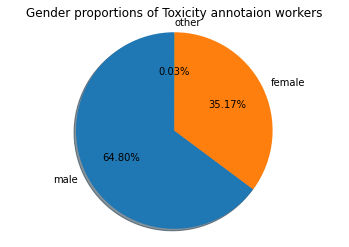

In [12]:
# pie plot to see gender distribution of toxicity workers
fig1, ax1 = plt.subplots()
ax1.pie(toxicity_worker_demographics_df['gender'].value_counts(), autopct='%1.2f%%',
        shadow=True, startangle=90, labels=list(set(toxicity_worker_demographics_df['gender'])))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender proportions of Toxicity annotaion workers')
plt.savefig('Figures/toxicity_workers_gender')
plt.show()

The percentage of males(64.8%) is way higher than females(35.17%). The general population is much more balanced with gender ratio close to 1:1 (101 males to 100 females in 2018). So the worker population is not representative of the general population in terms of gender.

**Gender distribution of Personal Attacks annotation workers**

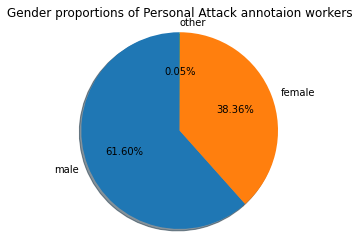

In [13]:
# pie plot to see gender distribution of toxicity workers
fig1, ax1 = plt.subplots()
ax1.pie(attack_worker_demographics_df['gender'].value_counts(), autopct='%1.2f%%',
        shadow=True, startangle=90, labels=list(set(attack_worker_demographics_df['gender'])))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender proportions of Personal Attack annotaion workers')
plt.savefig('Figures/attack_workers_gender')
plt.show()

We see similar mismatch in gender ratio for personal attack annotation workers compared to general population.

**Distribution of annotation workers based on first language**

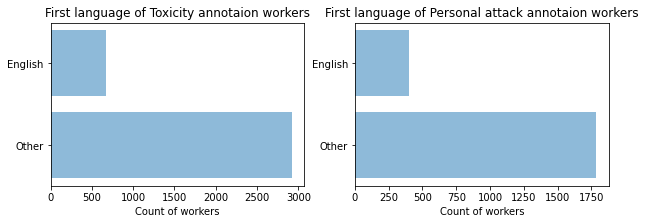

In [59]:
# bar chart of annotation workers based on first languague
fig = plt.figure(figsize =(10, 3))
plt.subplot(121)
objects = ["Other","English"]
y_pos = np.arange(len(objects))
x_pos = toxicity_worker_demographics_df['english_first_language'].value_counts()

plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('First language of Toxicity annotaion workers')
plt.savefig('Figures/toxicity_workers_language')

plt.subplot(122)
x_pos = attack_worker_demographics_df['english_first_language'].value_counts()
plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('First language of Personal attack annotaion workers')
plt.savefig('Figures/attack_workers_language')
plt.show()

We see majority of workers do not have English as their first language, this will result in poor annotations where some words do not make sense to the workers but might be toxic. The success of annotations is heavily contingent on the kind of training provided to workers before the annotation task.

Next, we see if the proportions of workers by their first langague is representative of general population.

In [22]:
# percentage of toxicity annotation workers by their first language
tox_speakers = toxicity_worker_demographics_df['english_first_language'].value_counts()
tox_speakers/tox_speakers.sum()

0    0.814536
1    0.185464
Name: english_first_language, dtype: float64

In [23]:
# percentage of personal attacks annotation workers by their first language
attack_speakers = attack_worker_demographics_df['english_first_language'].value_counts()
attack_speakers/attack_speakers.sum()

0    0.816438
1    0.183562
Name: english_first_language, dtype: float64

We see that in both datasets the proportion of annotation workers by the first langaugae is same and is also representative of the general population in the world where native English speakers are in minority. 

**Distribution of Toxicity annotation workers based on education level**

In [28]:
# percentage of toxicity annotation workers by their education level
tox_education = toxicity_worker_demographics_df['education'].value_counts()
tox_education/tox_education.sum()

bachelors       0.401281
hs              0.285714
masters         0.152047
professional    0.122807
some            0.025898
doctorate       0.011417
none            0.000835
Name: education, dtype: float64

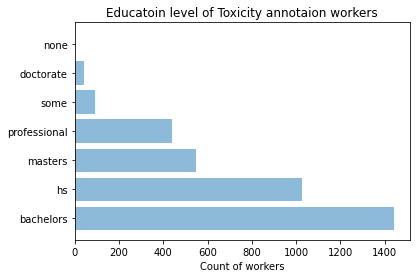

In [32]:
# bar chart of Toxicity annotation workers based on education level
objects = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none']
y_pos = np.arange(len(objects))
x_pos = toxicity_worker_demographics_df['education'].value_counts()

plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('Educatoin level of Toxicity annotaion workers')
plt.savefig('Figures/toxicity_workers_education')
plt.show()

We see that majority of toxicity annotation workers are highly educated with most of them have bachelors, professional or masters level of education. This is not representative of general population where very few people have college degrees. This might lead to failure to identify some informal and unliterary words spoken by lesser educated people and in certain communities which are not represented by the workers. Again, the success of annotations is heavily contingent on the kind of training provided to workers before the annotation task.

**Distribution of Personal attack annotation workers based on education level**

In [33]:
# percentage of personal attack annotation workers by their education level
attack_education = attack_worker_demographics_df['education'].value_counts()
attack_education/attack_education.sum()

bachelors       0.393607
hs              0.288128
masters         0.175799
professional    0.110959
some            0.021918
doctorate       0.009132
none            0.000457
Name: education, dtype: float64

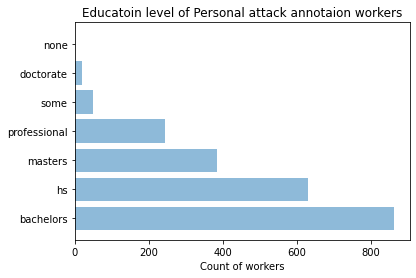

In [34]:
# bar chart of Personal attack annotation workers based on education level
objects = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none']
y_pos = np.arange(len(objects))
x_pos = attack_worker_demographics_df['education'].value_counts()

plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('Educatoin level of Personal attack annotaion workers')
plt.savefig('Figures/attack_workers_education')
plt.show()

We see similar distribution of workers based on education level as was for the toxicity dataset. So again there might be failures to identify some informal and unliterary words spoken by lesser educated people and in certain communities which are not represented by the workers.

**Distribution of workers based on age-group**

In [62]:
# percentage of toxicity annotation workers by their age-group
attack_education = attack_worker_demographics_df['age_group'].value_counts()
attack_education/attack_education.sum()

18-30       0.486775
30-45       0.385615
45-60       0.101160
Under 18    0.017169
Over 60     0.009281
Name: age_group, dtype: float64

In [63]:
# percentage of personal attack annotation workers by their age-group
attack_education = attack_worker_demographics_df['age_group'].value_counts()
attack_education/attack_education.sum()

18-30       0.486775
30-45       0.385615
45-60       0.101160
Under 18    0.017169
Over 60     0.009281
Name: age_group, dtype: float64

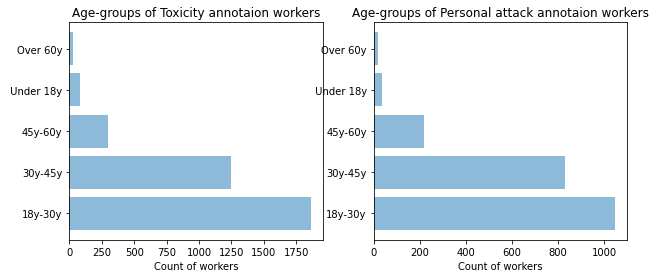

In [65]:
# bar chart of Toxicity annotation workers based on first languague
fig = plt.figure(figsize =(10, 4))
plt.subplot(121)
objects = ['18y-30y', '30y-45y', '45y-60y', ' Under 18y', 'Over 60y']
y_pos = np.arange(len(objects))
x_pos = toxicity_worker_demographics_df['age_group'].value_counts()

plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('Age-groups of Toxicity annotaion workers')
plt.savefig('Figures/toxicity_workers_age')

plt.subplot(122)
x_pos = attack_worker_demographics_df['age_group'].value_counts()
plt.barh(y_pos, x_pos, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count of workers')
plt.title('Age-groups of Personal attack annotaion workers')
plt.savefig('Figures/attack_workers_age')
plt.show()

Majority workers are in the age-group '18y-30y' and '30y-45y' which is not representative of the general population since we would expect majority population in the world to be 'Under 18'. Even the proportion of people in age group '45y-60y' would be higher than we see in the worker population. Having more worker belonging in age group '18y-30y' might affect the annotations as there may be personal bais in terms of workers' sensitivity towards harmful comments. 

**Conclusion of analysis 1**

We see that the worker demographics are way farther from the demographics of general population in the world and hence does not represent the real world effectively. There may be varied degrees of understanding between different age-groups towards what can be considered toxic or personal attack. Moreover, we need to know the demographics of the population who posted comments and articles which were annotated. Having such statistics would help in better sampling of the workers who should be used for annotation purposes.<br>
Under representation of females and other genders in the Crowdflower workers is a major concern as it would lead to the risk of having a biased model which might not be effective in identifying hate speech towards certain genders and communities.<br>
Majority of workers do not have English as their first language, this will result in poor annotations where some words do not make sense to the workers but might be used in hate speeches. <br>
Majority worker belonging in age groups '18y-30y' and '30y-45y' might affect the annotations as there may be personal bais in terms of workers' sensitivity towards harmful comments.<br>
In conclusion, we can say that skewed labeller demographic distribution will have severe consequences on the qulaity of annotations produced and hence models trained on such dataset will perform poorly in identifying hateful speeches targeting certain genders, communities, age-groups, languages and cultures.

#### **Analysis 2: How consistent are labeling behaviors among workers with different demographic profiles?**

We will study the labeling behaviors among annotaion workers for Toxicity datasets and see whether they are consistent among different demographic profiles. This is important because now we know that there is skewed labeller demographic distribution and we need to see if and how labeling behaviour among workers vary because it would be a potential source of bias.

**Labeling behaviors among Toxicity annotation workers**

First, we join the annotation dataframe with the worker demographics dataframe for the toxicity dataset.

In [83]:
# join annotation table to demographic table for toxicity dataset
toxicity_worker_demographics_df = toxicity_worker_demographics_df.set_index("worker_id")
toxicity_annotations_demographic = pd.merge(toxicity_annotations_df, toxicity_worker_demographics_df, left_on="worker_id", right_index=True)
# check the joined data
toxicity_annotations_demographic.head() 

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,mean_toxicity_score
0,2232.0,723,0,0.0,female,0,30-45,bachelors,-0.072052
71,37346.0,723,0,0.0,female,0,30-45,bachelors,-0.072052
417,227181.0,723,0,0.0,female,0,30-45,bachelors,-0.072052
4281,2810755.0,723,0,0.0,female,0,30-45,bachelors,-0.072052
10305,7270696.0,723,0,0.0,female,0,30-45,bachelors,-0.072052


Now we calculate the mean toxicity score for different age-groups, different genders and different education levels.

We define new variable in the toxicity_annotations_demographic dataframe, 'mean_toxicity_score' which is mean toxicity score per worker representing the toxicity bias of the worker.

In [104]:
mean_toxicity_score = toxicity_annotations_demographic.groupby("worker_id")["toxicity_score"].mean()
toxicity_worker_demographics_df["mean_toxicity_score"] = mean_toxicity_score
toxicity_worker_demographics_df.head()

#save new dataframe in CSV file inside clean data folder
toxicity_worker_demographics_df.to_csv('data/clean/toxicity_worker_demographics.csv')

**Toxicity bias among different age-groups**

In [85]:
# list personal biases in age-group of toxicity annotation workers
toxicity_worker_demographics_df.groupby("age_group").mean_toxicity_score.mean()

age_group
18-30       0.192189
30-45       0.236698
45-60       0.228319
Over 60     0.157787
Under 18    0.282304
Name: mean_toxicity_score, dtype: float64

In [87]:
# Average toxicity score for all workers
toxicity_worker_demographics_df.mean_toxicity_score.mean()

0.21102202851976515

Now we plot toxicity bias distribution in different age-groups for better visualization.

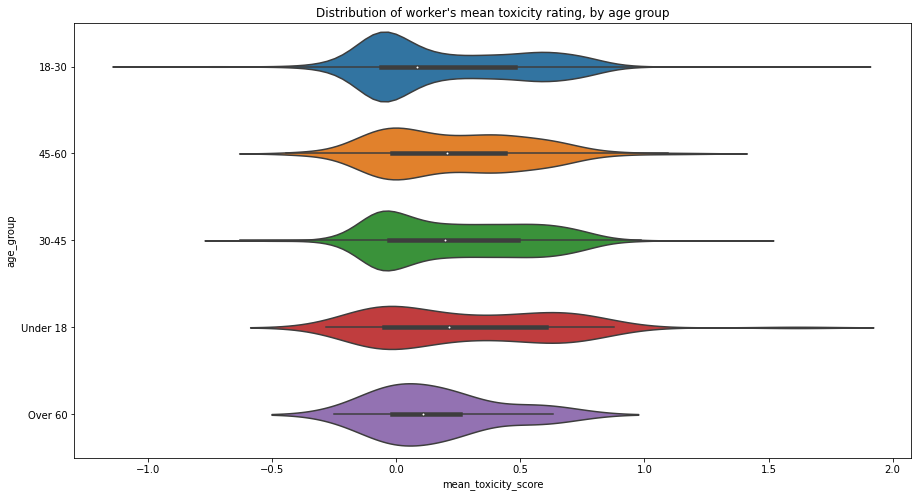

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean toxicity rating, by age group")
sns.violinplot( x="mean_toxicity_score", y="age_group", data=toxicity_worker_demographics_df, ax=ax )
plt.savefig('Figures/toxicity_bias_age')

We see that the persnal bias in toxicity rating varies across different age-groups. Next we see the proportion of annotations made by workers in different age-groups.

In [90]:
toxicity_annotation_count_by_age = toxicity_annotations_demographic.groupby("age_group").rev_id.count()
toxicity_annotation_count_by_age/toxicity_annotation_count_by_age.sum()

age_group
18-30       0.537462
30-45       0.355526
45-60       0.078266
Over 60     0.007375
Under 18    0.021372
Name: rev_id, dtype: float64

We see that the worker's mean toxicity rating varies with age-group. Since more than half of the annotations are done by workers in age-group '18y-30y', whose mean toxicity ratings is lesser than total average, we might see many annotations with lesser toxicity score but considerable amount of hate speech in actual comments. Also we will see many annotations with higher toxicity score but lesser amount of hate speech in actual comments.

**Toxicity bias among different genders**

We will calculate toxicity bias in different gender groups and study its implications.

In [91]:
# list toxicity bias per gender
toxicity_worker_demographics_df.groupby("gender").mean_toxicity_score.mean()

gender
female    0.177039
male      0.229320
other     0.553073
Name: mean_toxicity_score, dtype: float64

In [93]:
# proportion of annoations done per gender
toxicity_annotation_count_by_gender = toxicity_annotations_demographic.groupby("gender").rev_id.count()
toxicity_annotation_count_by_gender/toxicity_annotation_count_by_age.sum()

gender
female    0.347095
male      0.674881
other     0.000272
Name: rev_id, dtype: float64

We clearly see that 67% of annotations are done by males whose toxicity ratings are much higher than that of females. Another observation is that 'other' gender has the highest mean toxicity score but there are not enough workers in this category. Hence a model based on this dataset will fail to identify hate speeches targeted towards certain genders. 

**Toxicity bias among workers with different first langauge**

In [97]:
# list toxicity bias per different first language speakers
toxicity_worker_demographics_df.groupby("english_first_language").mean_toxicity_score.mean()

english_first_language
0    0.205993
1    0.233111
Name: mean_toxicity_score, dtype: float64

In [101]:
# proportion of annoations done per different first language speakers
toxicity_annotation_count_by_language = toxicity_annotations_demographic.groupby("english_first_language").rev_id.count()
toxicity_annotation_count_by_language/toxicity_annotation_count_by_age.sum()

english_first_language
0    0.844814
1    0.177433
Name: rev_id, dtype: float64

As 84% annotations are done by workers who are not native speakers of English and have lesser toxicity score than the other group who having English as their first langauge, it might be that certain words are being missed by these workers which would classify as being used in hate speech. A closer inspection should we done on the comments annotated by the two groups.

**Toxicity bias among workers with different education level**

In [98]:
# list toxicity bias per different education level
toxicity_worker_demographics_df.groupby("education").mean_toxicity_score.mean()

education
bachelors       0.206167
doctorate       0.275715
hs              0.226393
masters         0.184973
none            0.529019
professional    0.213412
some            0.219486
Name: mean_toxicity_score, dtype: float64

In [102]:
# proportion of annoations done per different education level
toxicity_annotation_count_by_education = toxicity_annotations_demographic.groupby("education").rev_id.count()
toxicity_annotation_count_by_education/toxicity_annotation_count_by_age.sum()

education
bachelors       0.409985
doctorate       0.011068
hs              0.289541
masters         0.155904
none            0.000702
professional    0.127847
some            0.027202
Name: rev_id, dtype: float64

workers with education level 'none' have very high toxicity rating and their representation is less. A closer inspection should be done into the comments annotated by them.

**Conclusion of analysis 2 on Toxicity dataset**

We see that all the demographic factors such as age, gender, education and langauge has an effect on labeling behaviors of the workers and as the worker demographics is not a representation of the real world it is a cause of concern as it leads to uneven scoring of toxicity of the same comment by different workers. Both cases are possible in such scenario where we will see examples of annotations with lesser toxicity score but considerable amount of hate speech in actual comments and also the examples of annotations with higher toxicity score but lesser amount of hate speech in actual comments.

## **Step 3. Further implications discussion**

Q1: What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?

A1: Since the annotations are done on comments in Enghlish, we can expect the Perspective API to work well with identifying hate speeches in English language. It will work poorly when applied to hate speech detection in other languages as the model performance is very heavily dependent on words used in annotated comments. Also since the annotations target only three types of hate speech(toxic, aggressive, personal attack), it will work well only in this context and would not be able to identify any other type of hate speech such as threat. Also, with time as new slurs would emerge, the model will perform poorly to identify any new expressions of hate speech.

Q2: What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

A2: As in the previous answer, hostile speech that are in language other than English or are used in context other than being toxic, personal attack or aggression would be difficult to detect by the models trained on this annotated data. Also the dynamic nature of hostile speech makes it even more difficult to identify any new hate speech expressions that emerge with time. The skewed labeller demographic distribution does not represent well certain genders, languages, cultures and therefore hostile speech expression used by such population will not be identified by the models trained on this annotated data. 

Q3: Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

A3: Clearly, there is a need for better demographic distribution in the labellers that is representative of the general population. Also different minority genders, communties and other language speakers should be identifies and used as part of labeling workforce. The process of annotations should be iterative and at every iteration, there should be reviewers in the loop to have a closer look at the annotations made by different demographic profiles to be on the look out for any personal biases. A strong and clear set of rules must be identified and given as guidelines to the labellers. The Perspective API or any such model is as good as the data it is trained on and as such I would focus on improving the quality of the annotations. 